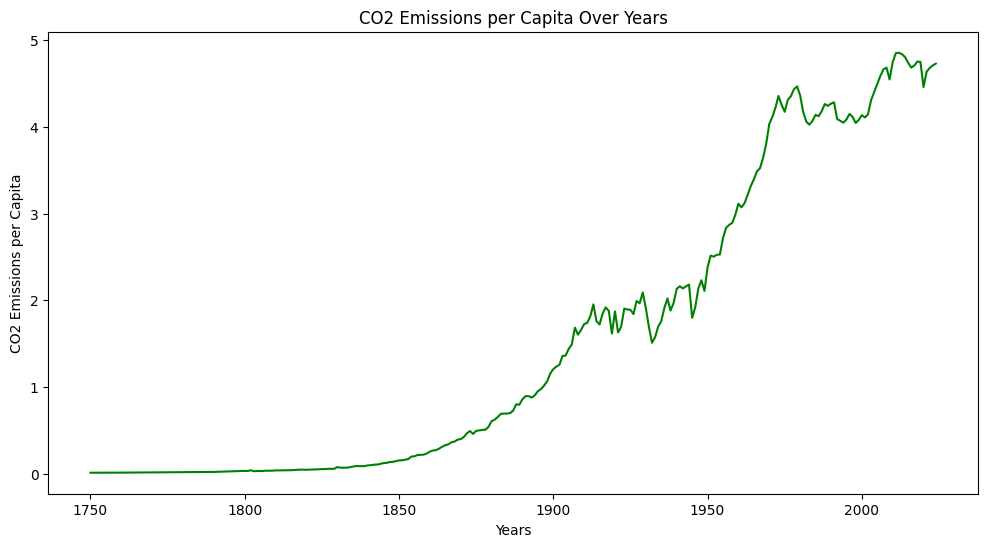

Slope before 1950: 0.0152
Slope after 1950: 0.0273


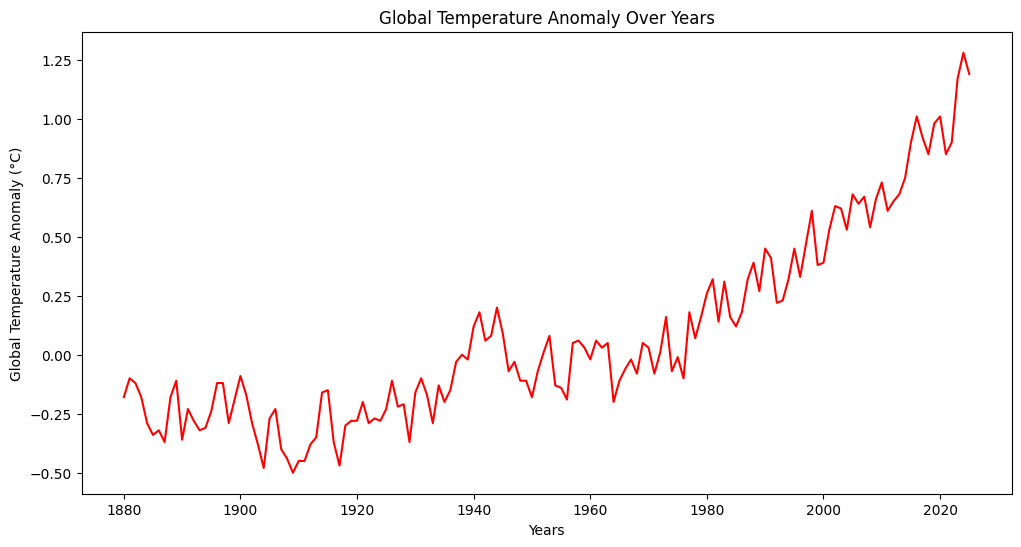

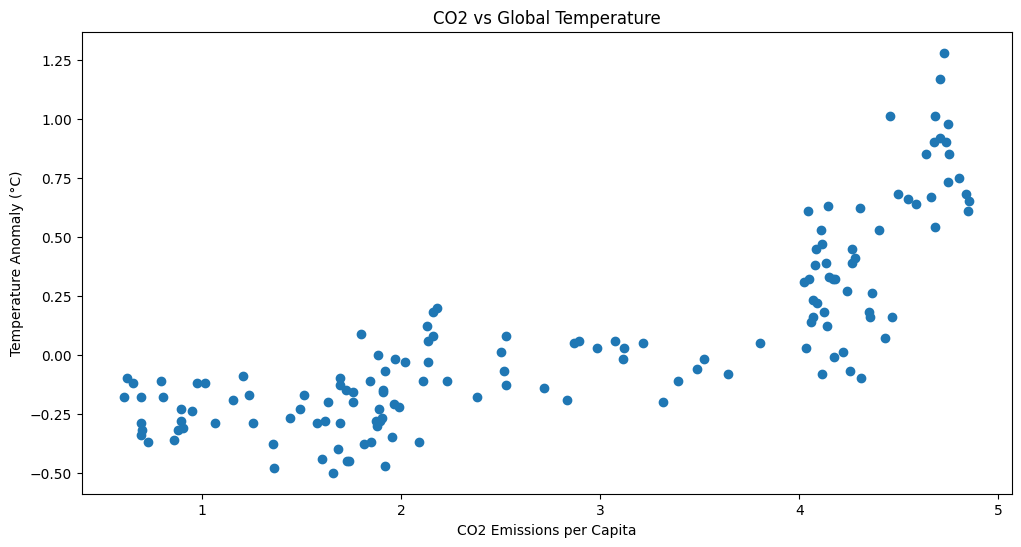

Slope: 0.23218115349484605
Intercept: -0.5798752096055683
R-squared: 0.6646808744831196
Temperature slope before 1950: 0.003772898259119936
Temperature slope after 1950: 0.015862588904694164


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

plt.style.use('default')   # reset style
plt.rcdefaults() 

co2 = pd.read_csv("./co2-emissions-per-capita.csv")
co2.head()

co2.columns

co2 =co2[co2["Entity"]=="World"]
co2.head()

co2 = co2[["Year", "CO₂ emissions per capita"]]
co2.rename(columns = {"CO₂ emissions per capita": "CO2_per_capita"}, inplace=True)


co2["Year"].min(),co2["Year"].max()

co2.isnull().sum()
co2.dropna(inplace=True)
co2.isnull().sum()



plt.figure(figsize=(12,6))
plt.plot(co2["Year"], co2["CO2_per_capita"], label="CO2 Emissions per Capita", color='green')
plt.xlabel("Years")
plt.ylabel("CO2 Emissions per Capita")
plt.title("CO2 Emissions per Capita Over Years")
plt.show()
pre_1950 = co2[co2["Year"] < 1950]
post_1950 = co2[co2["Year"] >= 1950]


def calculate_slope(data):
    X = data["Year"].values.reshape(-1, 1)
    y = data["CO2_per_capita"].values
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0]

slope_pre_1950 = calculate_slope(pre_1950)
slope_post_1950 = calculate_slope(post_1950)

print(f"Slope before 1950: {slope_pre_1950:.4f}")
print(f"Slope after 1950: {slope_post_1950:.4f}")

temp = pd.read_csv("./temperature.csv",skiprows=1)


temp = temp[["Year", "J-D"]]
temp.rename(columns={"J-D": "Global_Temperature_Anomaly"}, inplace=True)
temp["Global_Temperature_Anomaly"] = pd.to_numeric(temp["Global_Temperature_Anomaly"], errors='coerce')
temp.dropna(inplace=True)
temp.head()

plt.figure(figsize=(12,6))
plt.plot(temp["Year"], temp["Global_Temperature_Anomaly"], label="Global Temperature Anomaly", color='red')
plt.xlabel("Years")
plt.ylabel("Global Temperature Anomaly (°C)")
plt.title("Global Temperature Anomaly Over Years")
plt.show()
merged = pd.merge(co2,temp,on="Year", how="inner")

merged["Year"].min(), merged["Year"].max()


plt.figure(figsize=(12,6))
plt.scatter(merged["CO2_per_capita"], merged["Global_Temperature_Anomaly"])
plt.xlabel("CO2 Emissions per Capita")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("CO2 vs Global Temperature")
plt.show()

merged[["CO2_per_capita","Global_Temperature_Anomaly"]].corr()


X = merged["CO2_per_capita"].values.reshape(-1,1)
y = merged["Global_Temperature_Anomaly"].values

model = LinearRegression()
model.fit(X, y)

r_squared = model.score(X, y)
slope = model.coef_[0]
intercept = model.intercept_

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_squared)

pre_1950_temp = merged[merged["Year"] < 1950]
post_1950_temp = merged[merged["Year"] >= 1950]

def calculate_temp_slope(data):
    X = data["Year"].values.reshape(-1,1)
    y = data["Global_Temperature_Anomaly"].values
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0]

temp_slope_pre = calculate_temp_slope(pre_1950_temp)
temp_slope_post = calculate_temp_slope(post_1950_temp)

print("Temperature slope before 1950:", temp_slope_pre)
print("Temperature slope after 1950:", temp_slope_post)

